# Pick a target and energy that KDUQ should be fit to, and see if our prior looks somewhat similar

In [1]:
import numpy as np

In [2]:
neutron = (1, 0)
proton = (1, 1)

In [3]:
from jitr.reactions import ElasticReaction

In [4]:
from jitr.optical_potentials import kduq

In [5]:
kduq_samples = kduq.get_samples_federal(neutron)

In [6]:
import pickle

import elm

with open("./prior_distribution.pickle", "rb") as f:
    prior = pickle.load(f)
prior_samples = elm.elm.array_to_list(prior.rvs(1000))

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [7]:
target = (40, 20)
energy_lab = 35
rxn = ElasticReaction(target=target, projectile=neutron)
rxn.target.Efn

-11.998996893828007

In [8]:
kinematics = rxn.kinematics(energy_lab)
kinematics

ChannelKinematics(Elab=35, Ecm=34.1381096190068, mu=948.456319831029, k=1.2782522662832476, eta=0.0)

In [9]:
elm_prior_params = [
    elm.elm.calculate_parameters(neutron, target, kinematics.Ecm, rxn.target.Efn, p)
    for p in prior_samples
]

In [10]:
isoscalar, isovector, so0, so1, coul, asym = (
    np.array(l) for l in zip(*elm_prior_params)
)

In [11]:
kduq_params = [
    kduq.calculate_params(neutron, target, kinematics.Elab, p) for p in kduq_samples
]

/home/beyerk/Projects/jitr/src/jitr/optical_potentials/kduq.py:333: RuntimeWarning: overflow encountered in exp
  1 + np.exp((A - params["d2_A3"]) / params["d2_A2"])


In [12]:
kduq_coul, kduq_central, kduq_so = (np.array(l) for l in zip(*kduq_params))

In [13]:
np.mean(kduq_central, axis=0)

array([43.3536897 ,  3.98116843,  0.67744189,  3.76970208,  3.98116843,
        0.67744189,  4.9272036 ,  4.42616682,  0.56072929])

In [14]:
np.mean(isoscalar, axis=0)

array([39.57006945,  5.01629803,  7.84731174,  3.9043318 ,  0.72965038,
        3.9043318 ,  0.72965038])

In [15]:
np.mean(isovector, axis=0)

array([9.73041763e+00, 1.41163344e-02, 1.99744677e+01, 3.89949311e+00,
       7.28606033e-01, 3.89949311e+00, 7.28606033e-01])

In [16]:
np.mean(kduq_so, axis=0)

array([ 4.13747859,  3.48486319,  0.57430756, -0.13998511,  3.48486319,
        0.57430756])

In [17]:
np.mean(kduq_so[:, 0]) * 2

8.274957170870012

In [18]:
np.mean(so0[:, 0]) * 1.2**2

25.071596004142943

In [19]:
np.mean(so0, axis=0)

array([17.41083056, -0.9291999 ,  3.9043318 ,  0.72965038,  1.19896761])

In [20]:
np.mean(so1, axis=0)

array([4.28138376, 0.        , 3.89949311, 0.72860603, 1.20070875])

In [21]:
np.mean(coul, axis=0)

array([20.       ,  3.9043318])

In [22]:
np.mean(asym, axis=0)

0.0

In [23]:
np.std(isoscalar, axis=0)

array([1.95738654, 2.46937257, 2.7426424 , 0.16130858, 0.0246645 ,
       0.16130858, 0.0246645 ])

In [24]:
np.std(isovector, axis=0)

array([4.28442546, 3.28472993, 7.78745793, 0.16157017, 0.02522436,
       0.16157017, 0.02522436])

In [25]:
np.std(so0, axis=0)

array([0.86125008, 0.02364678, 0.16130858, 0.0246645 , 0.03051197])

In [26]:
np.std(so1, axis=0)

array([1.8851472 , 0.        , 0.16157017, 0.02522436, 0.0297339 ])

In [27]:
np.std(coul, axis=0)

array([0.        , 0.16130858])

In [28]:
np.std(asym, axis=0)

0.0

In [29]:
r = np.linspace(0.1, 10, 100)
vso_kduq = kduq.spin_orbit(r, *np.mean(kduq_so, axis=0))
vso_elm = elm.elm.spin_orbit(r, 0, np.mean(so0, axis=0), np.mean(so1, axis=0))

In [30]:
from matplotlib import pyplot as plt

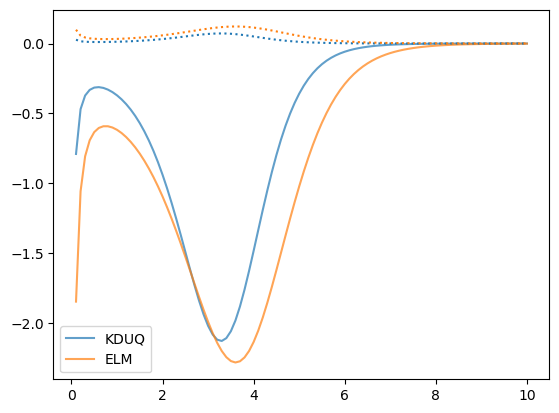

In [31]:
(p1,) = plt.plot(r, vso_kduq.real, alpha=0.7, label="KDUQ")
(p2,) = plt.plot(r, vso_elm.real, alpha=0.7, label="ELM")
plt.plot(r, vso_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vso_elm.imag, ":", color=p2.get_color())

plt.legend()